# 230968078 - Ishan Suryawanshi - Week9

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

2025-10-14 13:26:37.294710: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760448397.538571      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760448397.603817      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
NUM_SAMPLES = 5000
NOISE_FACTOR = 0.5 
LATENT_DIM = 32
BATCH_SIZE = 128
EPOCHS = 20

In [6]:
def preprocess_data(x):
    x = x.astype('float32')/255.0
    return x

In [4]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train[:NUM_SAMPLES]
x_test = x_test[:NUM_SAMPLES//5]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [7]:
x_train = preprocess_data(x_train)
x_test = preprocess_data(x_test)

In [10]:
def build_autoencoder(input_shape=(32, 32, 3)):
    input_img = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(LATENT_DIM, (3, 3), activation='relu', padding='same')(x)
    encoded = x

    decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return autoencoder

In [11]:
autoencoder_reconstruction = build_autoencoder()

In [12]:
autoencoder_reconstruction.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 3)      │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,731 (194.26 KB)

 Trainable params: 49,731 (194.26 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history_reconstruction = autoencoder_reconstruction.fit(
    x_train, x_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/20


I0000 00:00:1760448535.556445     101 service.cc:148] XLA service 0x7ab70002f220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760448535.557200     101 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1760448535.557222     101 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1760448535.908149     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


18/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0578

I0000 00:00:1760448538.829960     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.0471 - val_loss: 0.0161
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0154 - val_loss: 0.0113
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0111 - val_loss: 0.0100
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0095 - val_loss: 0.0085
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0082 - val_loss: 0.0075
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0078 - val_loss: 0.0071
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0072 - val_loss: 0.0068
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0068 - val_loss: 0.0079
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - val_loss: 0.0064
Epoch 12/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - val_

In [15]:
def visualize_reconstruction(model, x_test, n=10, title="Image Reconstruction"):
    reconstructed_imgs = model.predict(x_test[:n], verbose=0)

    plt.figure(figsize=(20, 4))
    plt.suptitle(title, fontsize=16)
    
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i])
        plt.title("Original")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(np.clip(reconstructed_imgs[i], 0., 1.)) 
        plt.title("Reconstructed")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    plt.show()

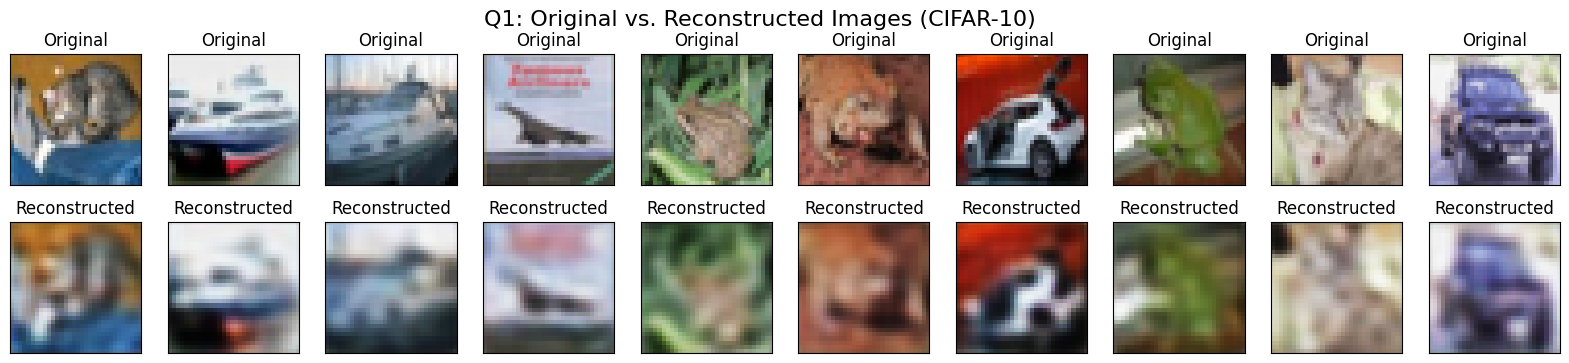

In [16]:
visualize_reconstruction(
    autoencoder_reconstruction, 
    x_test, 
    n=10, 
    title="Q1: Original vs. Reconstructed Images (CIFAR-10)"
)

In [17]:
def introduce_noise(X, factor=0.5):
    noise = np.random.normal(loc=0.0, scale=1.0, size=X.shape)
    noisy_X = X + factor * noise
    noisy_X = np.clip(noisy_X, 0., 1.)
    
    return noisy_X

In [18]:
x_train_noisy = introduce_noise(x_train, factor=NOISE_FACTOR)
x_test_noisy = introduce_noise(x_test, factor=NOISE_FACTOR)

In [19]:
autoencoder_denoising = build_autoencoder() 

In [21]:
history_denoising = autoencoder_denoising.fit(
    x_train_noisy, x_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(x_test_noisy, x_test) 
)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0459 - val_loss: 0.0226
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0214 - val_loss: 0.0171
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0172 - val_loss: 0.0160
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0159 - val_loss: 0.0153
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0154 - val_loss: 0.0146
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0147 - val_loss: 0.0156
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0145 - val_loss: 0.0147
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0145 - val_loss: 0.0146
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0140 - val_loss: 0.0135
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0134 - val_loss: 0.0132
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0133 - val_loss: 0.0130
Epoch 12/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0

In [22]:
def visualize_denoising(model, x_test_noisy, x_test_clean, n=10, title="Image Denoising"):
    denoised_imgs = model.predict(x_test_noisy[:n], verbose=0)

    plt.figure(figsize=(20, 6))
    plt.suptitle(title, fontsize=16)

    for i in range(n):
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(x_test_clean[i])
        plt.title("Clean")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(x_test_noisy[i])
        plt.title("Noisy Input")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(np.clip(denoised_imgs[i], 0., 1.)) 
        plt.title("Denoised Output")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    plt.show()

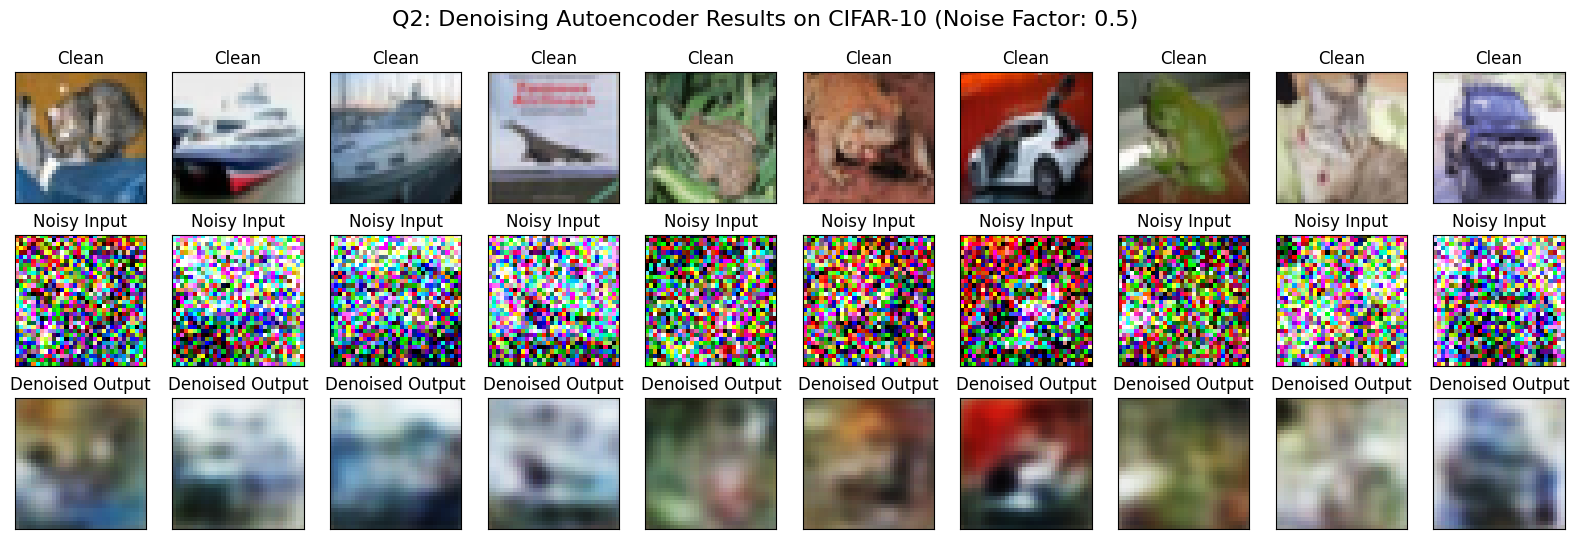

In [23]:
visualize_denoising(
    autoencoder_denoising, 
    x_test_noisy, 
    x_test, 
    n=10, 
    title=f"Q2: Denoising Autoencoder Results on CIFAR-10 (Noise Factor: {NOISE_FACTOR})"
)